In [1]:
seed = 42  # for reproducibility

import pickle
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False
%matplotlib inline

import os
import sys
from pathlib import Path
import torch
import torch.nn.functional as F
from torchvision.utils import make_grid, save_image
from sklearn.metrics import plot_confusion_matrix
torch.manual_seed(seed)
sys.path.append(str(Path().absolute().parent))
plt.style.use('seaborn')

In [2]:
exp_path = Path().absolute().parent.parent.joinpath('src/experiments/0037_Everycenter_1epr30fr_BALANCED_ResNet18')
clog_path = 'experiments/0038_Everycenter_1epr30fr_BALANCED_ResNet18Client_Logs'
stge_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/stge')
jarv_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/jarv')
bcdr_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/bcdr')
inbreast_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/inbreast')
cmmd_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/cmmd')

In [3]:
pickle_file = 'log.pkl'
with open(exp_path.joinpath(pickle_file), 'rb') as handle:
    aggregated_metrics = pickle.load(handle)
    
with open(stge_path.joinpath(pickle_file), 'rb') as handle:
    stge_metrics = pickle.load(handle)
with open(jarv_path.joinpath(pickle_file), 'rb') as handle:
    jarv_metrics = pickle.load(handle)
    
with open(inbreast_path.joinpath(pickle_file), 'rb') as handle:
    inbreast_metrics = pickle.load(handle)
    
with open(bcdr_path.joinpath(pickle_file), 'rb') as handle:
    bcdr_metrics = pickle.load(handle)
    
with open(cmmd_path.joinpath(pickle_file), 'rb') as handle:
    cmmd_metrics = pickle.load(handle)

In [4]:
cmmd_metrics.keys()

dict_keys(['local_loss', 'local_val_loss', 'local_accuracy', 'local_sensitivity', 'local_specificity', 'local_val_predictions', 'GMLD_accuracy', 'GMLD_true_positives', 'GMLD_false_positives', 'GMLD_false_negatives', 'GMLD_true_negatives', 'LMLD_train_accuracy', 'LMLD_val_accuracy', 'LMLD_train_true_positives', 'LMLD_train_false_positives', 'LMLD_train_false_negatives', 'LMLD_train_true_negatives', 'LMLD_val_true_positives', 'LMLD_val_false_positives', 'LMLD_val_false_negatives', 'LMLD_val_true_negatives'])

# Accuracies, 5 folds, 100 epochs. Average so that you get 1,100 np array (averaged across folds)

In [5]:
aggregated_metrics.keys()

dict_keys(['accuracies_aggregated', 'total_val_loss', 'time_spent'])

In [6]:
aggregated_metrics['accuracies_aggregated']

[0.5193827328480374,
 0.5193827328480374,
 0.5193827328480374,
 0.5193827328480374,
 0.5203014757383191,
 0.5100428356445129,
 0.5226810876663665,
 0.4954225657574753,
 0.5161480499015351,
 0.5118808649838249,
 0.5188698305546386,
 0.5158546059721534,
 0.512297290694788,
 0.5302477172470258,
 0.5175842591414825,
 0.5132876386587938,
 0.5292003906331522,
 0.5090498106500828,
 0.5328658774027142,
 0.5238208578778025,
 0.5321573404645026,
 0.5515979710029851,
 0.5254120812598944,
 0.5225929728747966,
 0.547192412993497,
 0.5480511679250332,
 0.5438273626411828,
 0.5600304913923231,
 0.5483674185001333,
 0.561431681641014]

In [7]:
inbreast_metrics['local_loss']

{0: [1.1443427801132202],
 1: [0.9325849413871765],
 2: [0.8701678514480591],
 3: [0.8588899970054626],
 4: [0.8528121113777161],
 5: [0.7745046615600586],
 6: [0.7385277152061462],
 7: [0.7805755734443665],
 8: [0.7584271430969238],
 9: [0.7637662887573242],
 10: [0.7540178298950195],
 11: [0.7403079867362976],
 12: [0.7441143989562988],
 13: [0.7287701368331909],
 14: [0.736424446105957],
 15: [0.7235462069511414],
 16: [0.721449077129364],
 17: [0.7450446486473083],
 18: [0.7187865376472473],
 19: [0.7310479283332825],
 20: [0.7154788970947266],
 21: [0.6801043748855591],
 22: [0.7082082033157349],
 23: [0.7041675448417664],
 24: [0.7367733120918274],
 25: [0.7287675738334656],
 26: [0.698555052280426],
 27: [0.6521283984184265],
 28: [0.6675334572792053],
 29: [0.637397825717926],
 30: []}

In [8]:
inbreast_metrics['local_val_loss']

{0: 0.8523129224777222,
 1: 0.8203821629285812,
 2: 0.7584989964962006,
 3: 0.7079827934503555,
 4: 0.6984523832798004,
 5: 0.7012461125850677,
 6: 0.6994884014129639,
 7: 0.7070190161466599,
 8: 0.7026475667953491,
 9: 0.6998789310455322,
 10: 0.7025073766708374,
 11: 0.6962396800518036,
 12: 0.7033772170543671,
 13: 0.697287380695343,
 14: 0.6975992023944855,
 15: 0.7013732343912125,
 16: 0.7128267884254456,
 17: 0.7154164612293243,
 18: 0.7114220261573792,
 19: 0.717315673828125,
 20: 0.6920034289360046,
 21: 0.708725094795227,
 22: 0.7244410812854767,
 23: 0.7376985400915146,
 24: 0.7255562841892242,
 25: 0.7488965392112732,
 26: 0.7555104494094849,
 27: 0.7291366904973984,
 28: 0.6958761364221573,
 29: 0.7323072999715805,
 30: []}

In [9]:
cmmd_metrics['local_loss']

{0: [3.005345344543457],
 1: [2.3839781284332275],
 2: [1.8987641334533691],
 3: [1.4021074771881104],
 4: [1.0845551490783691],
 5: [1.0304367542266846],
 6: [0.8168535232543945],
 7: [0.8624017238616943],
 8: [0.7981051802635193],
 9: [0.7729936838150024],
 10: [0.802237331867218],
 11: [0.8140895366668701],
 12: [0.8201922178268433],
 13: [0.824570894241333],
 14: [0.8206600546836853],
 15: [0.7767572999000549],
 16: [0.844875693321228],
 17: [0.8004847764968872],
 18: [0.8271381855010986],
 19: [0.864345133304596],
 20: [0.9075708389282227],
 21: [0.8475119471549988],
 22: [0.8439980745315552],
 23: [0.7985549569129944],
 24: [0.8513363599777222],
 25: [0.8581637144088745],
 26: [0.8487894535064697],
 27: [0.8973938226699829],
 28: [1.0515248775482178],
 29: [1.02197265625],
 30: []}

In [10]:
bcdr_metrics['local_val_loss']

{0: 1.0885679841041564,
 1: 1.030191457271576,
 2: 0.8970690131187439,
 3: 0.7913832187652587,
 4: 0.7460411429405213,
 5: 0.7098162770271301,
 6: 0.693239951133728,
 7: 0.6926138401031494,
 8: 0.6943698525428772,
 9: 0.7005934953689575,
 10: 0.7034425973892212,
 11: 0.7055813431739807,
 12: 0.7052080035209656,
 13: 0.7029374003410339,
 14: 0.7077769279479981,
 15: 0.7102268218994141,
 16: 0.7004337430000305,
 17: 0.7067001223564148,
 18: 0.7098592281341553,
 19: 0.7170848608016968,
 20: 0.7122958421707153,
 21: 0.6929834961891175,
 22: 0.6945363402366638,
 23: 0.6799372553825378,
 24: 0.677348792552948,
 25: 0.6962828516960144,
 26: 0.7019909381866455,
 27: 0.7061091542243958,
 28: 0.6892595291137695,
 29: 0.6992909193038941,
 30: []}

In [11]:
cmmd_metrics['LMLD_train_accuracy']

[0.494920993227991,
 0.494920993227991,
 0.494920993227991,
 0.494920993227991,
 0.4994356659142212,
 0.5468397291196389,
 0.6066591422121896,
 0.6139954853273137,
 0.6241534988713319,
 0.6128668171557562,
 0.6207674943566591,
 0.6258465011286681,
 0.6258465011286681,
 0.6252821670428894,
 0.6343115124153499,
 0.65744920993228,
 0.6529345372460497,
 0.6670428893905191,
 0.6602708803611738,
 0.6709932279909706,
 0.6732505643340858,
 0.6845372460496614,
 0.7059819413092551,
 0.7020316027088036,
 0.6997742663656885,
 0.7262979683972912,
 0.7054176072234764,
 0.7195259593679458,
 0.7409706546275395,
 0.7483069977426636]

In [12]:
cmmd_metrics['LMLD_val_accuracy']

[0.5292792792792793,
 0.5292792792792793,
 0.5292792792792793,
 0.5292792792792793,
 0.5315315315315315,
 0.5067567567567568,
 0.5923423423423423,
 0.6103603603603603,
 0.5743243243243243,
 0.5540540540540541,
 0.5788288288288288,
 0.5675675675675675,
 0.5630630630630631,
 0.5900900900900901,
 0.5788288288288288,
 0.5945945945945946,
 0.6013513513513513,
 0.6058558558558559,
 0.6193693693693694,
 0.6013513513513513,
 0.6148648648648649,
 0.6171171171171171,
 0.6283783783783784,
 0.6216216216216216,
 0.6216216216216216,
 0.6238738738738738,
 0.6261261261261262,
 0.6103603603603603,
 0.6261261261261262,
 0.6351351351351351]

## Curve

In [13]:
[cmmd_metrics['local_loss'][i][0] for i in range(len(cmmd_metrics['local_loss'])-1)]

[3.005345344543457,
 2.3839781284332275,
 1.8987641334533691,
 1.4021074771881104,
 1.0845551490783691,
 1.0304367542266846,
 0.8168535232543945,
 0.8624017238616943,
 0.7981051802635193,
 0.7729936838150024,
 0.802237331867218,
 0.8140895366668701,
 0.8201922178268433,
 0.824570894241333,
 0.8206600546836853,
 0.7767572999000549,
 0.844875693321228,
 0.8004847764968872,
 0.8271381855010986,
 0.864345133304596,
 0.9075708389282227,
 0.8475119471549988,
 0.8439980745315552,
 0.7985549569129944,
 0.8513363599777222,
 0.8581637144088745,
 0.8487894535064697,
 0.8973938226699829,
 1.0515248775482178,
 1.02197265625]

In [14]:
cmmd_losses_local = np.array([cmmd_metrics['local_loss'][i][0] for i in range(len(cmmd_metrics['local_loss'])-1)])
inbreast_losses_local = np.array([inbreast_metrics['local_loss'][i][0] for i in range(len(inbreast_metrics['local_loss'])-1)])
stge_losses_local = np.array([stge_metrics['local_loss'][i][0] for i in range(len(stge_metrics['local_loss'])-1)])
jarv_losses_local = np.array([jarv_metrics['local_loss'][i][0] for i in range(len(jarv_metrics['local_loss'])-1)])
bcdr_losses_local = np.array([bcdr_metrics['local_loss'][i][0] for i in range(len(bcdr_metrics['local_loss'])-1)])
steps = range(len(cmmd_losses_local))

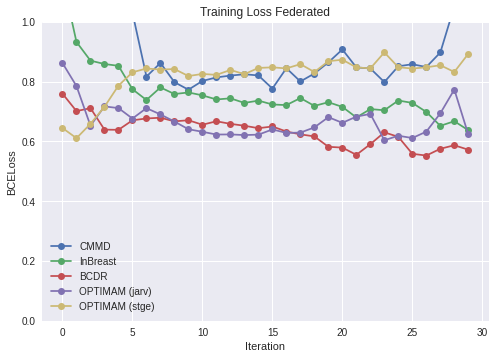

In [15]:
plt.plot(steps, cmmd_losses_local,'-o', label='CMMD')
plt.plot(steps, inbreast_losses_local,'-o', label='InBreast')
plt.plot(steps, bcdr_losses_local,'-o', label='BCDR')
plt.plot(steps, jarv_losses_local,'-o', label='OPTIMAM (jarv)')
plt.plot(steps, stge_losses_local,'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Training Loss Federated')
plt.savefig('./plots/train_loss_per_center_30EPR1FR.png')

In [16]:
cmmd_metrics['local_val_loss']

{0: 0.8182924873299069,
 1: 0.7788127746846941,
 2: 0.7331956790553199,
 3: 0.6929238928688897,
 4: 0.6911925382084316,
 5: 0.6905094093746609,
 6: 0.6926990548769633,
 7: 0.6946257525020175,
 8: 0.6965444684028625,
 9: 0.693476574950748,
 10: 0.6925204886330498,
 11: 0.6921423104074266,
 12: 0.6919877078798082,
 13: 0.6939246031973098,
 14: 0.69211532274882,
 15: 0.6903212653266059,
 16: 0.6963187098503113,
 17: 0.6955286502838135,
 18: 0.6906786719957988,
 19: 0.6968067288398743,
 20: 0.6947979874081082,
 21: 0.6946406854523552,
 22: 0.6929506950908237,
 23: 0.700464853975508,
 24: 0.7035677684677972,
 25: 0.6950653658972846,
 26: 0.695431731806861,
 27: 0.7094229406780667,
 28: 0.7024073322614034,
 29: 0.708160196410285,
 30: []}

In [17]:
for i in range(len(cmmd_metrics['local_val_loss'])-1):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [18]:
[cmmd_metrics['local_val_loss'][i] for i in range(len(cmmd_metrics['local_val_loss'])-1)]

[0.8182924873299069,
 0.7788127746846941,
 0.7331956790553199,
 0.6929238928688897,
 0.6911925382084316,
 0.6905094093746609,
 0.6926990548769633,
 0.6946257525020175,
 0.6965444684028625,
 0.693476574950748,
 0.6925204886330498,
 0.6921423104074266,
 0.6919877078798082,
 0.6939246031973098,
 0.69211532274882,
 0.6903212653266059,
 0.6963187098503113,
 0.6955286502838135,
 0.6906786719957988,
 0.6968067288398743,
 0.6947979874081082,
 0.6946406854523552,
 0.6929506950908237,
 0.700464853975508,
 0.7035677684677972,
 0.6950653658972846,
 0.695431731806861,
 0.7094229406780667,
 0.7024073322614034,
 0.708160196410285]

In [19]:
cmmd_losses_local = np.array([cmmd_metrics['local_val_loss'][i] for i in range(len(cmmd_metrics['local_val_loss'])-1)])
inbreast_losses_local = np.array([inbreast_metrics['local_val_loss'][i] for i in range(len(inbreast_metrics['local_val_loss'])-1)])
stge_losses_local = np.array([stge_metrics['local_val_loss'][i] for i in range(len(stge_metrics['local_val_loss'])-1)])
jarv_losses_local = np.array([jarv_metrics['local_val_loss'][i] for i in range(len(jarv_metrics['local_val_loss'])-1)])
bcdr_losses_local = np.array([bcdr_metrics['local_val_loss'][i] for i in range(len(bcdr_metrics['local_val_loss'])-1)])
steps = range(len(cmmd_losses_local))

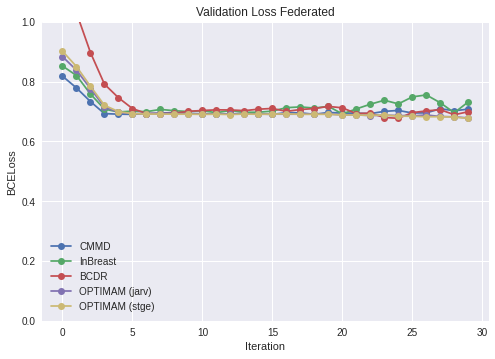

In [20]:
plt.plot(steps, cmmd_losses_local,'-o', label='CMMD')
plt.plot(steps, inbreast_losses_local,'-o', label='InBreast')
plt.plot(steps, bcdr_losses_local,'-o', label='BCDR')
plt.plot(steps, jarv_losses_local,'-o', label='OPTIMAM (jarv)')
plt.plot(steps, stge_losses_local,'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Validation Loss Federated')
plt.savefig('./plots/val_loss_per_center_30EPR1FR.png')

In [28]:
stge_f1 = [2 * stge_metrics['GMLD_true_positives'][i] / (2 * stge_metrics['GMLD_true_positives'][i] + stge_metrics['GMLD_false_positives'][i] + stge_metrics['GMLD_false_negatives'][i]) for i in range(len(stge_metrics['GMLD_true_positives']))]
jarv_f1 = [2 * jarv_metrics['GMLD_true_positives'][i] / (2 * jarv_metrics['GMLD_true_positives'][i] + jarv_metrics['GMLD_false_positives'][i] + jarv_metrics['GMLD_false_negatives'][i]) for i in range(len(jarv_metrics['GMLD_true_positives']))]
bcdr_f1 = [2 * bcdr_metrics['GMLD_true_positives'][i] / (2 * bcdr_metrics['GMLD_true_positives'][i] + bcdr_metrics['GMLD_false_positives'][i] + bcdr_metrics['GMLD_false_negatives'][i]) for i in range(len(jarv_metrics['GMLD_true_positives']))]
inbreast_f1 = [2 * inbreast_metrics['GMLD_true_positives'][i] / (2 * inbreast_metrics['GMLD_true_positives'][i] + inbreast_metrics['GMLD_false_positives'][i] + inbreast_metrics['GMLD_false_negatives'][i]) for i in range(len(jarv_metrics['GMLD_true_positives']))]
cmmd_f1 = [2 * cmmd_metrics['GMLD_true_positives'][i] / (2 * cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]

In [29]:
cmmd_f1

[0.6921944035346097,
 0.6921944035346097,
 0.6921944035346097,
 0.6921944035346097,
 0.6921944035346097,
 0.6580645161290323,
 0.5139186295503212,
 0.4835164835164835,
 0.4896073903002309,
 0.5687022900763359,
 0.5703564727954972,
 0.5781818181818181,
 0.5927272727272728,
 0.599640933572711,
 0.6028880866425993,
 0.6093189964157706,
 0.5798165137614679,
 0.5767097966728281,
 0.6077348066298343,
 0.5741811175337187,
 0.5606361829025845,
 0.5880077369439072,
 0.5621181262729125,
 0.5553470919324578,
 0.5633270321361059,
 0.592156862745098,
 0.5912698412698413,
 0.5593869731800766,
 0.5535353535353535,
 0.5737704918032787]